<a href="https://colab.research.google.com/github/0jayer/Autonomous_Robot_Simulations/blob/main/HW4ques2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
def correlation(img_path,F):
    #Load image
    img = cv2.imread(img_path,0)
    #get image and filter size
    m,n= img.shape #shape returns dimesnions of array
    k,l= F.shape
    #padding image
    #using np.pad to shorten the code
    img_padded = np.pad(img,((1,1),(1,1)), mode='constant', constant_values=0)

    #converting the filter matrix into a column vector
    f = F.flatten()
    G = np.zeros((m,n))
    for i in range(m):
      for j in range(n):
        t = img_padded[i:i+k,j:j+l]  #getting the specific part of the padded image for dot product
        t_ij = t.flatten()    #converting it into column vector

        G[i,j] = np.dot(f,t_ij) #calculating the output matrix using dot product

    G_pad = np.pad(G,((5,5),(5,5)), mode='constant', constant_values=0)
    return G

In [ ]:
F1 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])  # No change
F2 = np.array([[1,0,0],[0,0,0],[0,0,0]])          # move image down right
F3 = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])       # vertical edge detection
F4 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])       # horizontal edge detection
F5 = np.array([[1,2,1],[2,4,2],[1,2,1]])/16       # gaussian filter
F6 = np.array([[1,1,1],[1,1,1],[1,1,1]])/9        # moving average filter

G1 = correlation('parrot.png',F1)
G2 = correlation('parrot.png',F2)
G3 = correlation('parrot.png',F3)
G4 = correlation('parrot.png',F4)
G5 = correlation('parrot.png',F5)
G6 = correlation('parrot.png',F6)

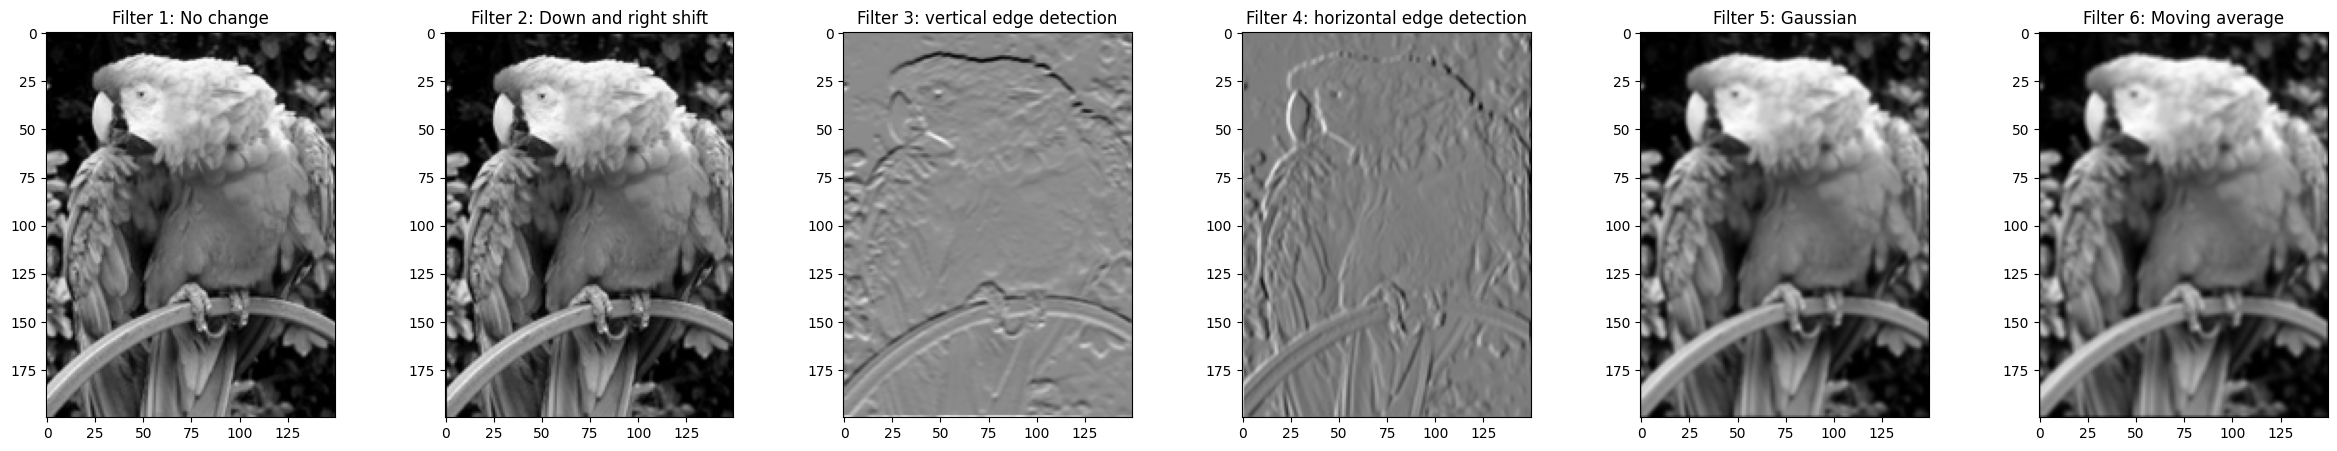

In [ ]:
# Display the results
plt.figure(figsize=(30, 5))
plt.subplot(1, 6, 1)
plt.imshow(G1, cmap='gray')
plt.title('Filter 1: No change')
plt.subplot(1, 6, 2)
plt.imshow(G2, cmap='gray')
plt.title('Filter 2: Down and right shift')
plt.subplot(1, 6, 3)
plt.imshow(G3, cmap='gray')
plt.title('Filter 3: vertical edge detection')
plt.subplot(1, 6, 4)
plt.imshow(G4, cmap='gray')
plt.title('Filter 4: horizontal edge detection')
plt.subplot(1, 6, 5)
plt.imshow(G5, cmap='gray')
plt.title('Filter 5: Gaussian')
plt.subplot(1, 6, 6)
plt.imshow(G6, cmap='gray')
plt.title('Filter 6: Moving average')
plt.show()